In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools

In [2]:
wine_tr = pd.read_csv("wine_flag_training.csv")
wine_test = pd.read_csv("wine_flag_test.csv")
wine_tr

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
995,White,High,Low
996,White,Low,Low
997,White,Low,High
998,White,Low,Low


In [3]:
wine_test

,Type,Alcohol_flag,Sugar_flag
0,Red,Low,Low
1,Red,Low,Low
2,Red,Low,Low
3,Red,Low,Low
4,Red,Low,Low
...,...,...,...
2340,White,High,High
2341,White,High,Low
2342,White,High,Low
2343,White,High,Low


In [4]:
t1 = pd.crosstab(wine_tr['Type'], wine_tr['Alcohol_flag'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()
t1

Alcohol_flag,High,Low,Total
Type,,,
Red,218,282,500
White,268,232,500
Total,486,514,1000


<AxesSubplot:xlabel='Alcohol_flag'>

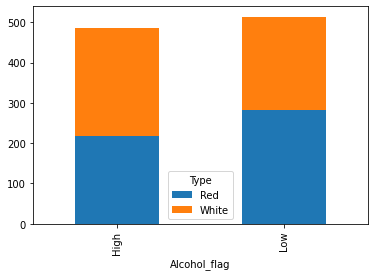

In [5]:

t1_plot = pd.crosstab(wine_tr['Alcohol_flag'], wine_tr['Type'])
t1_plot.plot(kind='bar', stacked = True)

X_Alcohol_ind = np.array(wine_tr['Alcohol_flag'])
(X_Alcohol_ind , X_Alcohol_ind_dict) = stattools. categorical(X_Alcohol_ind,drop=True, dictnames = True)
X_Alcohol_ind = pd.DataFrame(X_Alcohol_ind)
X_Sugar_ind = np.array(wine_tr['Sugar_flag'])
(X_Sugar_ind , X_Sugar_ind_dict) = stattools.categorical(X_Sugar_ind,drop=True, dictnames = True)
X_Sugar_ind = pd.DataFrame(X_Sugar_ind)
X = pd.concat((X_Alcohol_ind, X_Sugar_ind), axis = 1)
Y = wine_tr['Type']
nb_01 = MultinomialNB().fit(X, Y)
X_Alcohol_ind_test = np.array(wine_test['Alcohol_flag'])
(X_Alcohol_ind_test, X_Alcohol_ind_dict_test) = stattools.categorical(X_Alcohol_ind_test,drop=True, dictnames = True)
X_Alcohol_ind_test = pd.DataFrame(X_Alcohol_ind_test)
X_Sugar_ind_test = np.array(wine_test['Sugar_flag'])
(X_Sugar_ind_test, X_Sugar_ind_dict_test) = stattools. categorical(X_Sugar_ind_test,drop=True, dictnames = True)
X_Sugar_ind_test = pd.DataFrame(X_Sugar_ind_test)
X_test = pd.concat((X_Alcohol_ind_test, X_Sugar_ind_test), axis = 1)

In [6]:
train_d=pd.get_dummies(wine_tr,columns=['Sugar_flag','Alcohol_flag'])
y_train_d=train_d[['Type']]
x_train_d=train_d.drop(columns=['Type'])
test_d=pd.get_dummies(wine_test,columns=['Sugar_flag','Alcohol_flag'])
y_test_d=test_d[['Type']]
x_test_d=test_d.drop(columns=['Type'])
x_test_d

,Sugar_flag_High,Sugar_flag_Low,Alcohol_flag_High,Alcohol_flag_Low
0,0,1,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
2340,1,0,1,0
2341,0,1,1,0
2342,0,1,1,0
2343,0,1,1,0


In [7]:
nb_01 = MultinomialNB().fit(x_train_d, y_train_d)

c:\_uni\term8\datamining\hws\codes\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [8]:
Y_predicted = nb_01.predict(x_test_d)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(wine_test['Type'], Y_predicted))

[[ 464  121]
 [ 678 1082]]


In [9]:
print(classification_report(y_test_d, Y_predicted))

              precision    recall  f1-score   support

         Red       0.41      0.79      0.54       585
       White       0.90      0.61      0.73      1760

    accuracy                           0.66      2345
   macro avg       0.65      0.70      0.63      2345
weighted avg       0.78      0.66      0.68      2345

